# Conditions when one can assume steady state in the shell

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import os, traceback, sys, h5py

In [2]:
plt.rcParams.update({'font.size': 20})

%config InlineBackend.figure_format='retina'

### Importing the code + PyPackage locally

In [3]:
sys.path.append('/Users/ajinkyakulkarni/Desktop/GitHub/py-pde')
import pde

sys.path.append('/Users/ajinkyakulkarni/Desktop/GitHub/py-droplets')
import droplets

sys.path.append('/Users/ajinkyakulkarni/Desktop/GitHub/py-phasesep')
import phasesep

sys.path.append('/Users/ajinkyakulkarni/Desktop/GitHub/agent-based-emulsions')
import agent_based

######################################################################################################################

In [4]:
KB = 2e-3

KF = 5e-4

KF + KB

0.0025

In [18]:
k = 1e-3

A = 1e-1 * k

# A = 0 * k

D = 1e4 * k

R = 20

L = 20

In [19]:
A, D, k

(0.0001, 10.0, 0.001)

In [20]:
f'{A} - {k} * c'

'0.0001 - 0.001 * c'

In [21]:
cINF = A/k

cINF

0.1

In [22]:
xeta = np.sqrt(D/k)

xeta

100.0

In [23]:
timescale_k = (1/k)

timescale_diffusivity = (L**2 / D)

timescale_k, timescale_diffusivity

(1000.0, 40.0)

In [24]:
NS = round(timescale_k / timescale_diffusivity, 3)

NS # This should be >= 0.1 for assuming steady state inside shell

25.0

In [25]:
cEqOut = 2 * 0.083/R

cfar = 0.1

cEqOut, cfar

(0.0083, 0.1)

### Outside the droplet

Text(0.5, 1.0, 'Theory')

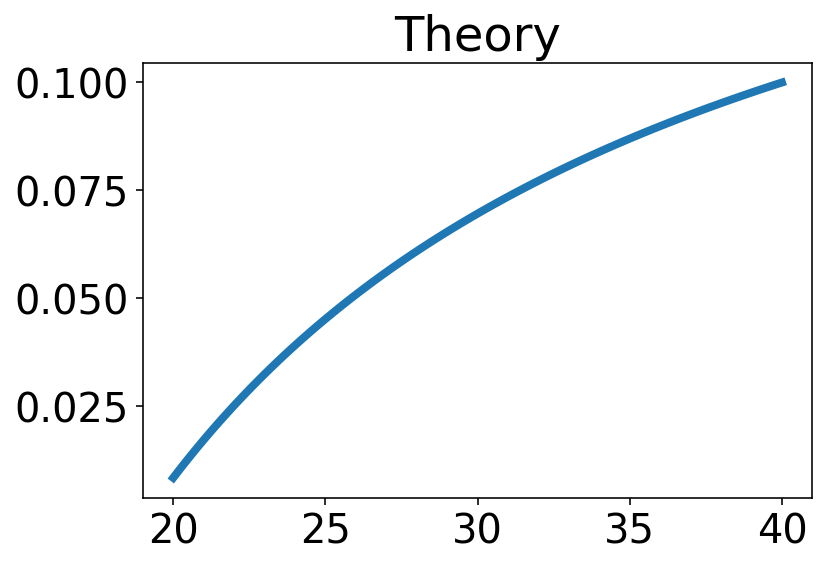

In [26]:
r = np.linspace(R, R + L, 100)

analytical_solution = (np.exp(L/xeta)*(-1 + 1/(np.tanh(L/xeta))) * (A*r*np.sinh(L/xeta) - 
                                    (A - cfar*k)*(L + R)*np.sinh((r - R)/xeta) + 
                                    (-A + cEqOut*k)*R*np.sinh((L - r + R)/xeta)))/(k*r)

plt.plot(r, analytical_solution, linewidth = 4)

plt.title('Theory')

Text(0, 0.5, '$-D \\nabla \\phi_{out}$')

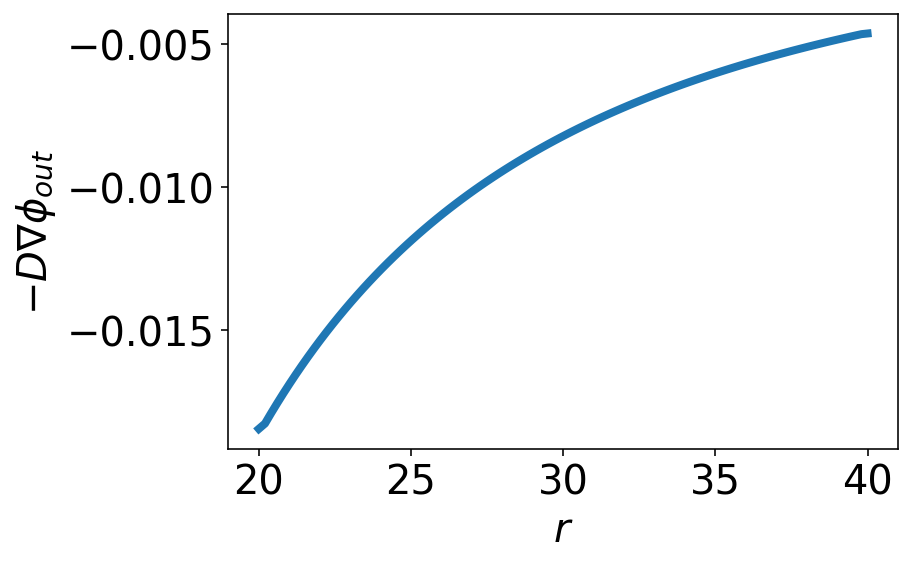

In [27]:
plt.plot(r, -D*np.gradient(analytical_solution), linewidth = 4)

plt.xlabel(r'$r$')

plt.ylabel(r'$-D \nabla \phi_{out}$')

In [28]:
grid = pde.SphericalGrid([R, R + L], 100)

field = pde.ScalarField.random_uniform(grid)

bcs = [{"value": cEqOut}, {"value": cfar}]

eq = phasesep.ReactionDiffusionPDE({'diffusivity': D, 'reaction_flux': f'{A} -({k}) * c', "bc": bcs})

plot_tracker = pde.trackers.PlotTracker(interval = 10)

sol = eq.solve(field, t_range = 5e3, tracker = ['progress', plot_tracker]);

  0%|          | 0/5000.0 [00:00<?, ?it/s]

Output()

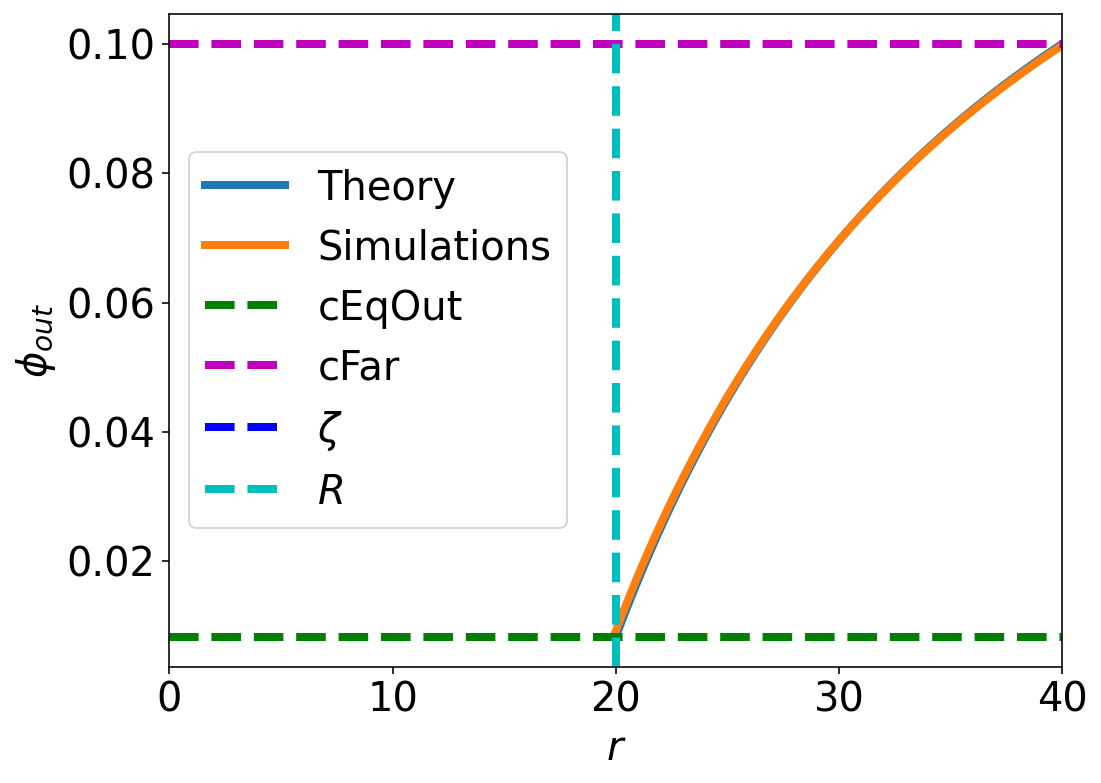

In [29]:
plt.figure(figsize = (8, 6))

plt.plot(r, analytical_solution, linewidth = 4, label = 'Theory')

plt.plot(r, sol.data, linewidth = 4, label = 'Simulations')

plt.axhline(y = cEqOut, color = 'g', linestyle = '--', linewidth = 4, label = 'cEqOut')

plt.axhline(y = cfar, color = 'm', linestyle = '--', linewidth = 4, label = 'cFar')

plt.axvline(x = R + xeta, color = 'b', linestyle = '--', linewidth = 4, label = r'$\zeta$')

plt.axvline(x = R, color = 'c', linestyle = '--', linewidth = 4, label = r'$R$')

plt.xlabel(r'$r$')

plt.ylabel(r'$\phi_{out}$')

plt.xlim(0, R + L)

plt.legend()